In [137]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
drscarlat_medicalclaimssynthetic1m_path = kagglehub.dataset_download('drscarlat/medicalclaimssynthetic1m')

print('Data source import complete.')


Data source import complete.


In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medicalclaimssynthetic1m/MedicalClaimsSynthetic1M.csv


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [140]:
path = '/kaggle/input/medicalclaimssynthetic1m/MedicalClaimsSynthetic1M.csv'
df = pd.read_csv(path, nrows=5000)


In [141]:
df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,CLM_FROM_DT,CLM_THRU_DT,ICD9_DGNS_CD_1,PRF_PHYSN_NPI_1,HCPCS_CD_1,LINE_NCH_PMT_AMT_1,LINE_BENE_PTB_DDCTBL_AMT_1,LINE_COINSRNC_AMT_1,LINE_PRCSG_IND_CD_1,LINE_ICD9_DGNS_CD_1
0,BAC397A752FA03A7,19330101,0,2,1,Y,31,150,12,12,...,20081212,20081212,1629,6.502930e+09,99213,190.0,0.0,60.0,X,1629
1,BE4841C03C968C6B,19341201,0,2,1,Y,45,552,12,12,...,20080808,20080808,4281,2.497673e+09,99213,60.0,0.0,10.0,A,4280
2,0DCFC21B16C7A18F,19300901,0,2,1,0,5,430,12,12,...,20090917,20090917,4019,3.714600e+09,99214,80.0,0.0,20.0,A,4011
3,5ED5E5248B290111,19220201,0,2,1,0,33,800,12,12,...,20081122,20081122,49121,7.607075e+09,99213,50.0,0.0,10.0,A,496
4,7FA31DE58F7B26E1,19280801,0,2,1,0,10,510,12,12,...,20081013,20081013,38601,6.928373e+09,99213,50.0,0.0,10.0,A,38611


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DESYNPUF_ID                 5000 non-null   object 
 1   BENE_BIRTH_DT               5000 non-null   int64  
 2   BENE_DEATH_DT               5000 non-null   int64  
 3   BENE_SEX_IDENT_CD           5000 non-null   int64  
 4   BENE_RACE_CD                5000 non-null   int64  
 5   BENE_ESRD_IND               5000 non-null   object 
 6   SP_STATE_CODE               5000 non-null   int64  
 7   BENE_COUNTY_CD              5000 non-null   int64  
 8   BENE_HI_CVRAGE_TOT_MONS     5000 non-null   int64  
 9   BENE_SMI_CVRAGE_TOT_MONS    5000 non-null   int64  
 10  BENE_HMO_CVRAGE_TOT_MONS    5000 non-null   int64  
 11  PLAN_CVRG_MOS_NUM           5000 non-null   int64  
 12  SP_ALZHDMTA                 5000 non-null   int64  
 13  SP_CHF                      5000 

In [143]:
print(df.shape)
print(df.columns)

(5000, 43)
Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'CLM_ID',
       'CLM_FROM_DT', 'CLM_THRU_DT', 'ICD9_DGNS_CD_1', 'PRF_PHYSN_NPI_1',
       'HCPCS_CD_1', 'LINE_NCH_PMT_AMT_1', 'LINE_BENE_PTB_DDCTBL_AMT_1',
       'LINE_COINSRNC_AMT_1', 'LINE_PRCSG_IND_CD_1', 'LINE_ICD9_DGNS_CD_1'],
      dtype='object')


In [144]:
drop_cols = [
    'DESYNPUF_ID',           # Beneficiary ID — drop
    'CLM_ID',                # Claim ID
    'CLM_FROM_DT', 'CLM_THRU_DT',  # Dates — drop unless extracting duration
    'PRF_PHYSN_NPI_1',       # Doctor ID
    'ICD9_DGNS_CD_1',        # Medical billing codes
    'LINE_ICD9_DGNS_CD_1',
    'LINE_PRCSG_IND_CD_1',
    'SP_STATE_CODE',         # Location code — optional
    'BENE_COUNTY_CD'         # County code — optional
]

df = df.drop(columns=drop_cols)


In [145]:
# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Categorical Columns: ['BENE_ESRD_IND']


In [146]:
X = df.copy()

pt = PowerTransformer()
X_gauss = pt.fit_transform(X)

model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)  # Unsupervised fit

IsolationForest(contamination=0.01, random_state=42)

In [147]:
y_pred = model.predict(X)
scores = model.decision_function(X)

# Anomalies are predicted as -1, inliers as 1
anomalies = X[y_pred == -1]

print("Number of anomalies detected:", len(anomalies))
display(anomalies.head())



Number of anomalies detected: 50


,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,...,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,HCPCS_CD_1,LINE_NCH_PMT_AMT_1,LINE_BENE_PTB_DDCTBL_AMT_1,LINE_COINSRNC_AMT_1
19,19390401,0,1,3,0,12,12,0,0,1,...,1770.0,1500.0,900.0,3850.0,1470.0,0.0,99213,0.0,0.0,140.0
45,19440301,0,1,1,1,12,12,12,12,1,...,24090.0,5900.0,0.0,5400.0,960.0,0.0,99213,40.0,0.0,10.0
98,19630501,0,1,3,1,12,12,12,12,1,...,29490.0,7370.0,0.0,4970.0,1280.0,0.0,99213,290.0,0.0,70.0
99,19320501,0,2,1,1,12,12,0,0,1,...,11810.0,4050.0,0.0,14190.0,4440.0,30.0,99214,140.0,140.0,30.0
150,19150201,0,1,1,1,12,12,5,6,1,...,35040.0,7970.0,0.0,9420.0,2160.0,300.0,99213,0.0,0.0,0.0


In [148]:
print("\nAnomaly scores (lower is more anomalous):")
display(pd.Series(scores))


Anomaly scores (lower is more anomalous):


,0
0,0.009234
1,0.130490
2,0.213388
3,0.161994
4,0.187580
...,...
4995,0.048180
4996,0.113492
4997,0.150923
4998,0.208913


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


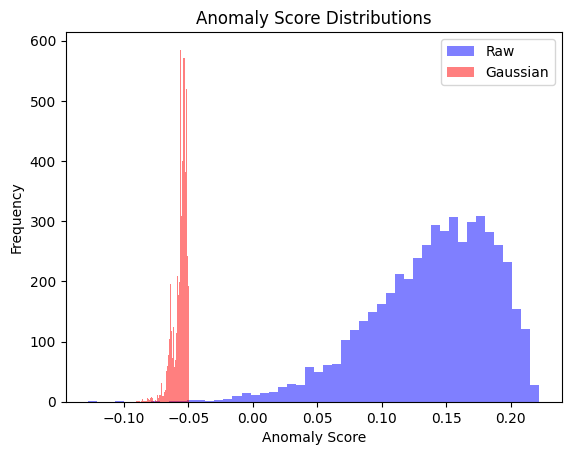

In [149]:
plt.hist(model.decision_function(X), bins=50, color='blue', alpha=0.5, label='Raw')
plt.hist(model.decision_function(X_gauss), bins=50, color='red', alpha=0.5, label='Gaussian')
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Anomaly Score Distributions")
plt.show()


In [150]:
# Using PCA for better ploting
X_pca = PCA(n_components=2).fit_transform(X_gauss)

In [151]:
# Combine results for plotting
result_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
result_df['Anomaly'] = y_pred
result_df['Anomaly'] = result_df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})


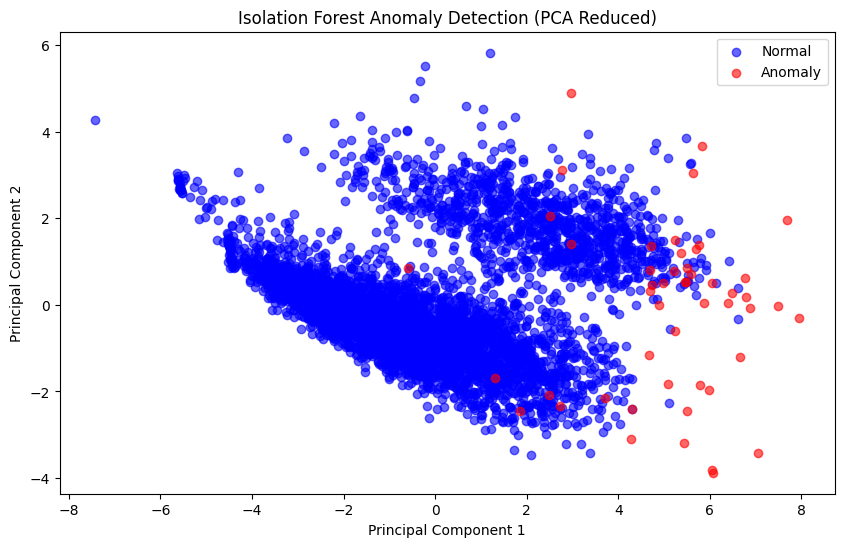

In [152]:
plt.figure(figsize=(10, 6))
colors = {'Normal': 'blue', 'Anomaly': 'red'}

for label in ['Normal', 'Anomaly']:
    subset = result_df[result_df['Anomaly'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[label], label=label, alpha=0.6)

plt.title("Isolation Forest Anomaly Detection (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()